In [1]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import numpy as np
import datetime
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
### 表の枠を作る ###
columns = ["絶対値","前日比"]
Time = pd.DataFrame(["-","-"],columns=[datetime.date.today()],index=columns).T
index_table = pd.DataFrame(["--","--"],columns=["指数"],index=columns).T
future_table = pd.DataFrame(["--","--"],columns=["先物"],index=columns).T


In [3]:
#### （最新） ####
### 日経平均, TOPIX, JASDAQ ###
### 日経平均先物, TOPIX先物 ###
yahoo_url = "https://stocks.finance.yahoo.co.jp/stocks/detail/?code="
dic_index = {
    "日経平均":"998407",
    "TOPIX":"998405",
    "JASDAQ":"23337",
}
dic_future = {
    "日経平均1ヶ月":"5040469",
    "TOPIX 1ヶ月":"5040468"
}
def create_table_latest(dic,base_table):
    key_list = list(dic.keys())
    for i in range(len(key_list)):
        html = requests.get(yahoo_url+dic[key_list[i]]).text
        bs = BeautifulSoup(html, 'html.parser')
        absolute = bs.find_all(class_="stoksPrice")
        index_price = float(absolute[1].text.replace(',',''))

        comparison = bs.find_all(class_="icoDownRed yjMSt")
        if comparison == ([]):
            comparison = bs.find_all(class_="icoUpGreen yjMSt")
            if comparison == ([]):
                comparison = bs.find_all(class_="icoNoChange yjMSt")
        else:
            comparison
        growth_rate = comparison[0].text

        price_and_rate = [index_price,growth_rate]
        df = pd.DataFrame(price_and_rate,index=columns,columns=[key_list[i]]).T
        base_table = base_table.append(df,ignore_index=False)
    return base_table

Table_index = create_table_latest(dic=dic_index,base_table=index_table)
Table_future = create_table_latest(dic=dic_future,base_table=future_table)
Table = Time.append(Table_index,ignore_index=False)
Table = Table.append(Table_future,ignore_index=False)
Table

,絶対値,前日比
2020-05-04,-,-
指数,--,--
日経平均,19619.3,-574.34（-2.84%）
TOPIX,1431.26,-32.77（-2.24%）
JASDAQ,144.51,-0.85（-0.58%）
先物,--,--
日経平均1ヶ月,19630,-430.00（-2.14%）
TOPIX 1ヶ月,1427.5,-26.50（-1.82%）


In [4]:
### csvに出力する ###
Table.to_csv("datasets/capital_market/latest_index_future_table.csv",encoding='utf_8_sig')

In [5]:
#### （歴史） ####
### 日経平均, TOPIX, JASDAQ ###
latest_data = pd.DataFrame(Table.values[2:5,0],columns=[Table.index[0].strftime("%Y/%m/%d")],index=list(dic_index.keys())).T
print(latest_data) ## （デフォルト用）：latest_data.to_csv("datasets/historical_table.csv",encoding='utf_8_sig')

csv_path = os.path.join("datasets","capital_market","Historical_Data","historical_table.csv")
original_table = pd.read_csv(csv_path,index_col=0)
historical_table = original_table.append(latest_data,ignore_index=False)
historical_table.to_csv("datasets/capital_market/Historical_Data/historical_table.csv",encoding='utf_8_sig')
historical_table


               日経平均    TOPIX  JASDAQ
2020/05/04  19619.3  1431.26  144.51


,日経平均,TOPIX,JASDAQ
2020/03/18,16726.5,1270.84,125.88
2020/03/19,16552.8,1283.22,123.97
2020/03/23,16887.8,1292.01,125.2
2020/03/24,18092.3,1333.1,129.7
2020/03/25,19546.6,1424.62,135.81
2020/03/26,18664.6,1399.32,133.47
2020/03/27,19389.4,1459.49,135.45
2020/03/30,19085,1435.54,133.24
2020/03/31,18917,1403.04,133.43
2020/04/01,18065.4,1351.08,129.87


In [6]:
# 図を調整する前に：historical_table = pd.read_csv(csv_path,index_col=0)
#                historical_table

In [7]:
date_index = np.linspace(0,len(historical_table.index)-1,10).astype("int")
selected_date = historical_table.index[date_index]
selected_date_ls = list(selected_date)

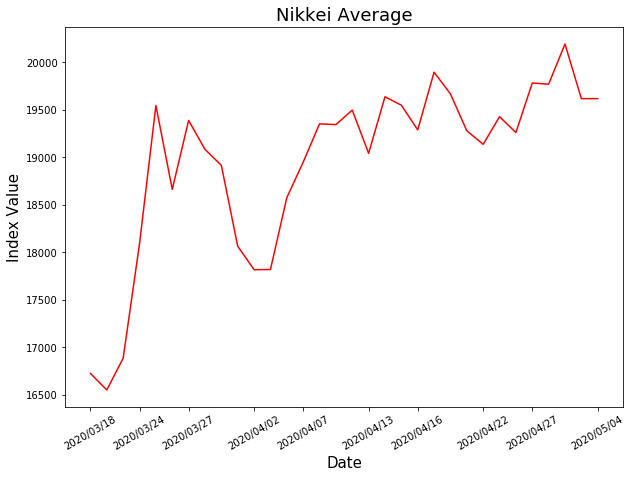

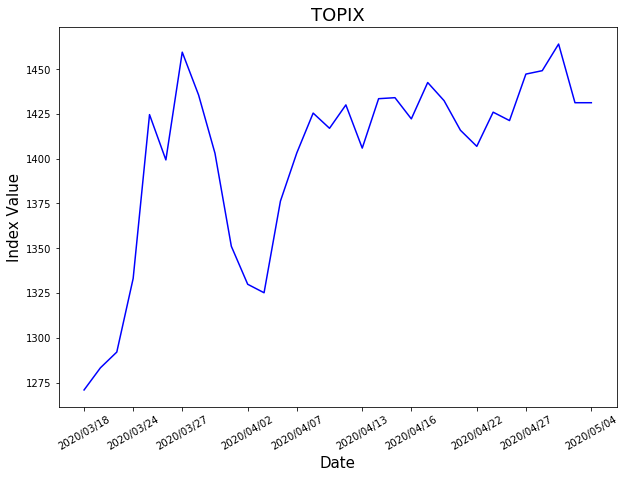

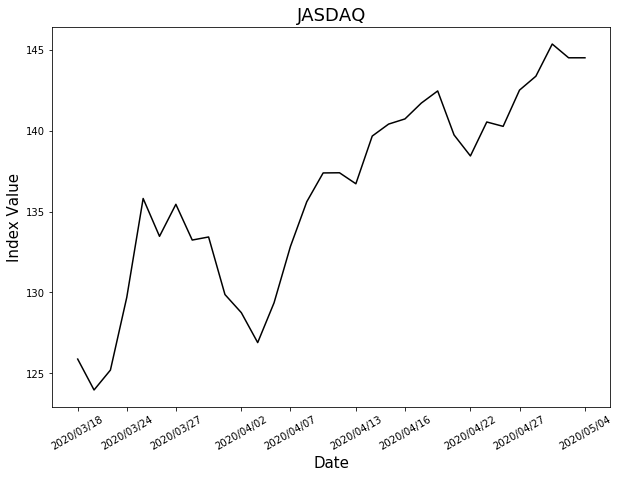

In [8]:
def plot_and_save_historical_index(target,color,title):
    figure_path = os.path.join("datasets","capital_market","Historical_Data",title+".png")
    plt.figure(figsize=(10,7))
    plt.plot(historical_table.index,historical_table.loc[:,target].values,color)
    plt.xlabel("Date",fontsize=15)
    plt.ylabel("Index Value",fontsize=15)
    plt.xticks(selected_date_ls,rotation=30,fontsize=10)
    plt.title(title,fontsize=18)
    plt.savefig(figure_path)
    plt.show()
plot_and_save_historical_index(target="日経平均",color="r",title="Nikkei Average")
plot_and_save_historical_index(target="TOPIX",color="b",title="TOPIX")
plot_and_save_historical_index(target="JASDAQ",color="k",title="JASDAQ")

In [11]:
# 最新日付のデータを削除する #
#historical_table = historical_table.drop(index=Table.index[0].strftime("%Y/%m/%d"),axis=0)
#historical_table.to_csv("datasets/capital_market/Historical_Data/historical_table.csv",encoding='utf_8_sig')